- How do I choose the model hyperparameters? (ex. KNN n_neghbors)
- Will the model perform well in new data?
- Which model should I choose for my problem?

We need evaluation metrics to answer these questions.

4 examples:

Accuracy: 

- Classification accuracy is the number of correct predictions made as a ratio of all predictions made. (% correct)
- a high accuracy does not mean a model is good

Confusion matrix: 

- A table that describes the performance of a classification model. (TP, TN, FP, FN; percentage of each)

Precision: 

- (for binary classification) this is the number of true positives divided by the number of true positives plus the number of false positives. (TP / (TP + FP))
- Precision is used when the goal is to limit the number of false positives.
- a low precision means that there are a lot of false positives
- ex. spam emails - we want to limit the number of false positives (non-spam emails that are classified as spam)

Recall: 

- (for binary classification) is the number of true positives divided by the number of true positives plus the number of false negatives. (TP / (TP + FN))
- Recall is used when the goal is to limit the number of false negatives.
- a low recall means that there are a lot of false negatives
- ex. cancer diagnosis - we want to limit the number of false negatives (people who have cancer but are classified as not having cancer)

In [58]:
# load pima indian diabetes dataset
import pandas as pd
diabetes = pd.read_csv('../../Data/pima.csv')

In this dataset:

Each row is a patient, each column is a feature, and the last column is the class label (1 = has diabetes, 0 = no diabetes)

Goal:

to predict if a patient has diabetes or not

Recall or precision?

- recall since we want to catch all the positive cases (diabetes)

#### But how well will our predictions work on new data? 
Train-test split
- Default split is 75% for training and 25% for testing
- Splits data into training and testing sets, where the training set is used to train the model and the testing set is used to evaluate the model's performance

Cross Validation
- Works by splitting the data into a specified number of folds (ex. k=5) (like multiple train-test splits)
- Each fold acts as the testing set 1 time, and acts as the training set k times
- Average testing performance is used as the estimate of out-of-sample performance

In [59]:
diabetes

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [60]:
# feature matrix X, target vecotr y
X = diabetes.drop('label', axis=1)
y = diabetes['label']

In [61]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Evaluation metrics

In [62]:
# import the eval metics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [63]:
# import a model
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=10)

# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [64]:
# predict on the test set
y_pred = knn.predict(X_test)

In [65]:
# now we can evaluate the model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy:  0.71875
Precision:  0.6363636363636364
Recall:  0.5072463768115942
Confusion Matrix: 
 [[103  20]
 [ 34  35]]


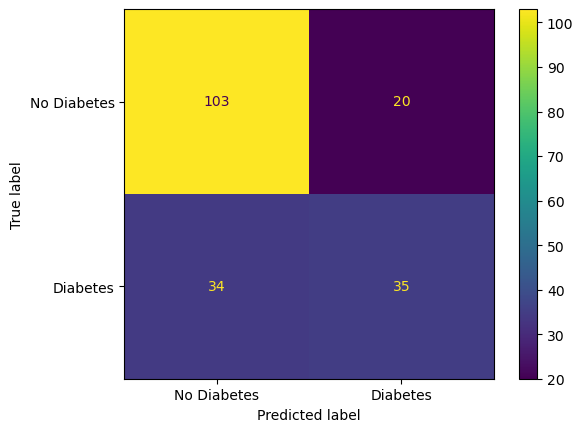

In [66]:
# sklearn confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
# disp = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, display_labels=['No Diabetes', 'Diabetes'], normalize='true')
# use percentages
disp.plot()

In [67]:
# recall
TP = cm[1, 1]
FN = cm[1, 0]
recall = TP / (TP + FN)
print('Recall: ', recall)

Recall:  0.5072463768115942


In [68]:
recall_score(y_test, y_pred)

0.5072463768115942

In [69]:
# precision
TP = cm[1, 1]
FP = cm[0, 1]
precision = TP / (TP + FP)
print('Precision: ', precision)

Precision:  0.6363636363636364


### Cross-validation

In [79]:
from sklearn.model_selection import cross_val_score

# 10-fold cross validation
cv_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print('CV scores: ', cv_scores)
# use the average as an estimate of out-of-sample accuracy (new data accuracy)
print('CV scores mean: ', cv_scores.mean())

CV scores:  [0.7012987  0.80519481 0.72727273 0.7012987  0.71428571 0.77922078
 0.72727273 0.80519481 0.72368421 0.75      ]
CV scores mean:  0.7434723171565277


**Example 1** select the best hyper parameters for KNN

In [80]:
knn5 = KNN(n_neighbors=5)
knn10 = KNN(n_neighbors=10)
knn15 = KNN(n_neighbors=15)
knn20 = KNN(n_neighbors=20)

In [81]:
score5 = cross_val_score(knn5, X, y, cv=10, scoring='accuracy').mean()
score10 = cross_val_score(knn10, X, y, cv=10, scoring='accuracy').mean()
score15 = cross_val_score(knn15, X, y, cv=10, scoring='accuracy').mean()
score20 = cross_val_score(knn20, X, y, cv=10, scoring='accuracy').mean()

In [83]:
# show scores in table
scores = pd.DataFrame({'k': [5, 10, 15, 20], 'score': [score5, score10, score15, score20]})
scores
# k=20 seems to be the best


,k,score
0,5,0.721377
1,10,0.743472
2,15,0.744805
3,20,0.746189


**Example 2** select the best model

In [90]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg_score = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()
logreg_score # log regression is better than the best knn model in this case

# scale the data to prevent the warnings from sklearn
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# logreg_score_scaled = cross_val_score(logreg, X_scaled, y, cv=10, scoring='accuracy').mean()

0.7721804511278195

**Example 3** select the best features

In [91]:
X.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age'],
      dtype='object')

In [92]:
# can I drop glucose
X_no_glucose = X.drop('glucose', axis=1)
score_no_glucose = cross_val_score(logreg, X_no_glucose, y, cv=10, scoring='accuracy').mean()
score_no_glucose # the model is worse without glucose

/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6965652768284347

In [70]:
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier

# # split dataset into features and target variable
# X = diabetes.iloc[:, :-1]
# y = diabetes.iloc[:, -1]

# # split dataset into train and test set
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     stratify=y,
#                                                     random_state=42)

# # instantiate model
# rf = RandomForestClassifier(n_estimators=100,
#                             random_state=42)

# # fit model
# rf.fit(X_train, y_train)

# # predict on test set
# y_pred = rf.predict(X_test)

# # show all evaluation metrics
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# print('Accuracy: ', accuracy_score(y_test, y_pred))
# print('Precision: ', precision_score(y_test, y_pred))
# print('Recall: ', recall_score(y_test, y_pred))
# print('F1: ', f1_score(y_test, y_pred))
# print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
# print('Classification Report: \n', classification_report(y_test, y_pred))